# Measure Pitch and plot it on the spectrogram

### Import modules

In [3]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Set up the graphs to make it look nice.

In [4]:
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100 # Show nicely large images in this notebook

### Load the sound.  
If this happens correctly, nothing will happen.

## Measure pitch

### Load the sound

In [5]:
sound = parselmouth.Sound("03-01-01-01-01-01-01.wav")

### Create a pitch object

In [6]:
pitch = sound.to_pitch()

#### The pitch object has lots of information contained in it.  If you <code>print</code> the `pitch` object, you can see lots of info, but to get at that info, we need to do more work.

In [7]:
print(pitch)

Object type: Pitch
Object name: <no name>
Date: Tue Feb  4 14:28:08 2020

Time domain:
   Start time: 0 seconds
   End time: 3.3032916666666665 seconds
   Total duration: 3.3032916666666665 seconds
Time sampling:
   Number of frames: 327 (101 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.02164583333333325 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 89.718277 Hz = 83.110285 Mel = -1.87831416 semitones above 100 Hz = 2.73680497 ERB
   16% = 92.1188235 Hz = 85.1703004 Mel = -1.4211853 semitones above 100 Hz = 2.80153952 ERB
   50% = 108.562358 Hz = 99.0775147 Mel = 1.42228758 semitones above 100 Hz = 3.23461476 ERB
   84% = 133.074159 Hz = 119.176835 Mel = 4.94676541 semitones above 100 Hz = 3.84887588 ERB
   90% = 138.332026 Hz = 123.394172 Mel = 5.61762247 semitones above 100 Hz = 3.97609486 ERB

Estimated spreading:
   84%-median = 24.63 Hz = 20.2 Mel = 3.542 semitones = 0.6173 ERB
   median-16% = 16.53 Hz = 13.98 Mel = 2.858 semitones = 0.4352 ERB
   90

### How would we get mean, median, min, max, and standard deviation of pitch into variables to use later?

#### `import` the `call` function from the `parselmouth.praat` module

In [8]:
from parselmouth.praat import call

#### Run the call function
The call function can run any command in Praat and has the following structure:  
<code>call(object, Praat command, Parameters)</code>

#### Mean

In [9]:
mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
print(mean_pitch)

111.84901197921828


#### Median

In [10]:
median_pitch = call(pitch, "Get quantile", 0, 0, 0.5, "Hertz")
print(median_pitch)

108.56235825303753


#### Minimum pitch

In [11]:
min_pitch = call(pitch, "Get minimum", 0, 0, "Hertz", "Parabolic")
print(min_pitch)

80.69497545473912


#### Maximum pitch

In [12]:
max_pitch = call(pitch, "Get maximum", 0, 0, "Hertz", "Parabolic")
print(max_pitch)

157.8143907778332


#### Standard deviation of pitch

In [13]:
standard_deviation_pitch = call(pitch, "Get standard deviation", 0, 0, "Hertz")
print(standard_deviation_pitch)

17.814617875565055


### Pitch scales

#### Hertz

In [14]:
mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
print(mean_pitch)

111.84901197921828


#### Mel

In [15]:
mean_pitch = call(pitch, "Get mean", 0, 0, "Mel")
print(mean_pitch)

101.61969985358265


#### ERB

In [16]:
mean_pitch = call(pitch, "Get mean", 0, 0, "ERB")
print(mean_pitch)

3.309428149871681


#### Semitones above 440 Hz
440 Hz is middle "a" on the piano and a common reference tone in music

In [17]:
mean_pitch = call(pitch, "Get mean", 0, 0, "semitones re 440 Hz")
print(mean_pitch)

-23.924225677627415


#### Rounding numbers.
We have a lot of decimals.  Python can round them for us...
Use the `round` function.  

`round(object, decimal places)`


In [18]:
print(round(mean_pitch, 3))

-23.924


### Plotting Pitch

To plot pitch, we need to get the data for frequency and for time. Then we can plot that.

#### Extract selected pitch contour

In [19]:
pitch_values = pitch.selected_array['frequency']

When there is no pitch (i.e. it is unvoices), frequency in Praat is 0.  We don't want to plot lots of 0's though, so we replace unvoiced samples by NaN to not plot.  To do that we use `numpy`, which we imported as `np`, and tell it to replace any 0's with `nan`.  `nan` stands for not a number, and matplotlib knows to skip these values.

In [20]:
pitch_values[pitch_values==0] = np.nan

#### Plot the pitch.  

Time values (the x axis data) are returned as an array when we run the command `pitch.xs()`.  
We are plotting this twice.  This is so our line is outlined in white and stands out on the colour background better.

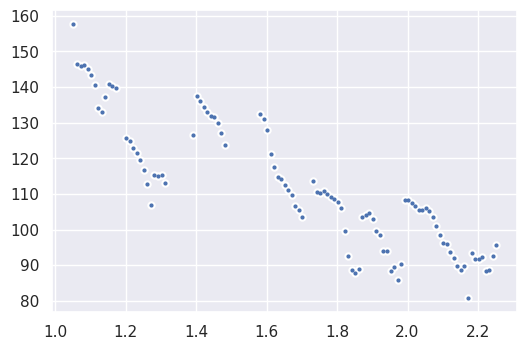

In [21]:
plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)

Get rid of those grids

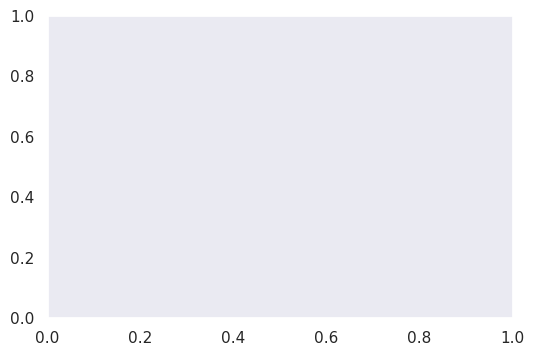

In [22]:
plt.grid(False)

Add y limits

(0, 600.0)

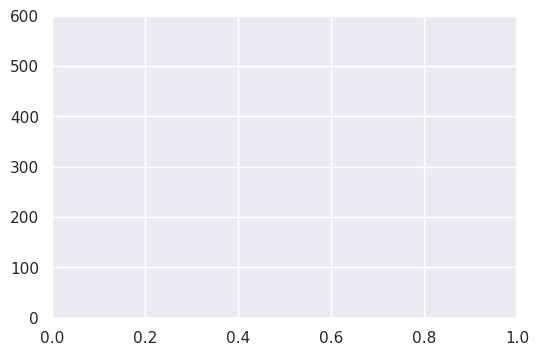

In [23]:
plt.ylim(0, pitch.ceiling)

Add y labels

Text(0, 0.5, 'fundamental frequency [Hz]')

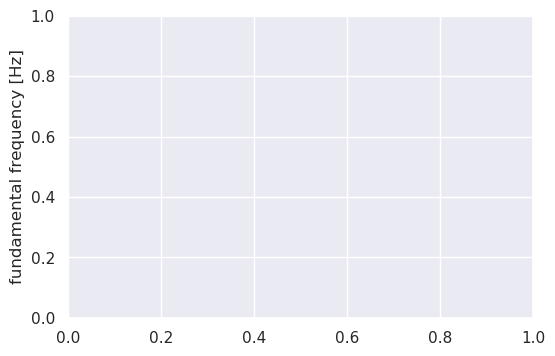

In [24]:
plt.ylabel("fundamental frequency [Hz]")

#### That doesn't really work because we need to make a function out of that code

In [25]:
def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

In [27]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

First we draw the spectrogram

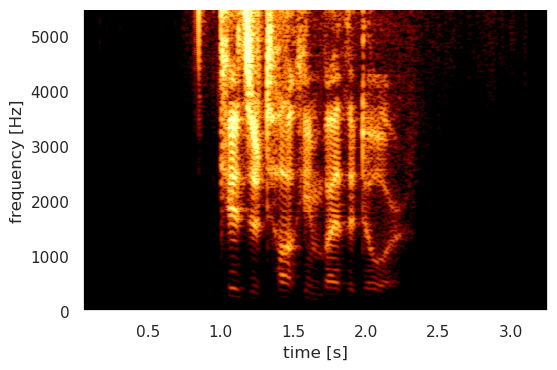

In [31]:
sound.pre_emphasize()
spectrogram = sound.to_spectrogram(window_length=0.05, maximum_frequency=5500)
draw_spectrogram(spectrogram)

Then we tell Python that we want a second Y axis, but the same X axis using the `twinx()` function

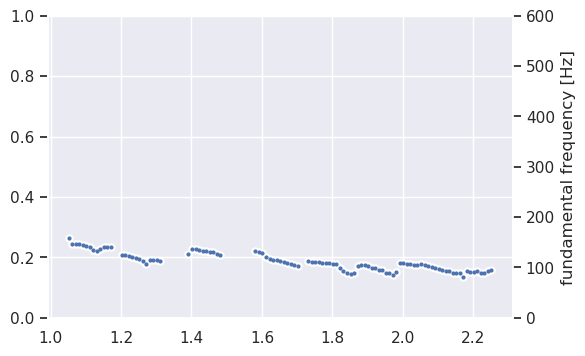

In [32]:
plt.twinx()
draw_pitch(pitch)

Then we adjust the X axis.  `xmin` and `xmax` are the beginning and end times.

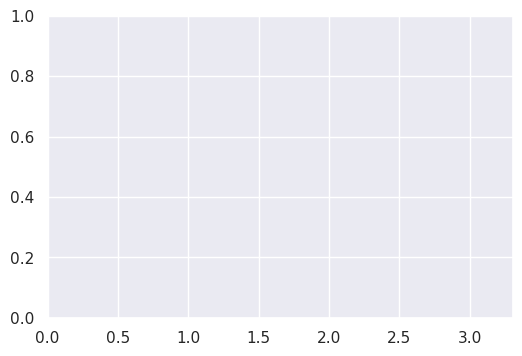

In [62]:
plt.xlim([sound.xmin, sound.xmax])
plt.show()

#### In order for this all to work in jupyter notebook, it all has to be in the same code cell

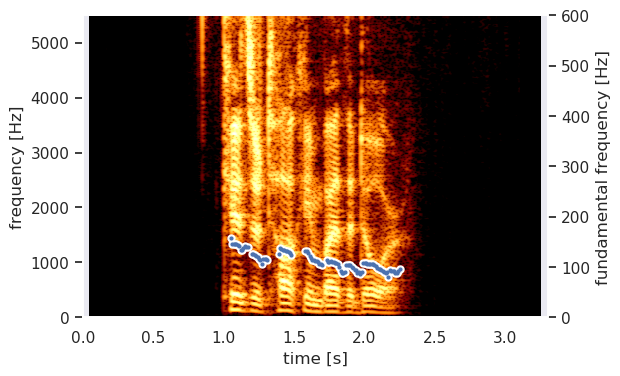

In [38]:
sound = parselmouth.Sound("03-01-01-01-01-01-01.wav")
sound.pre_emphasize()
spectrogram = sound.to_spectrogram(window_length=0.05, maximum_frequency=5500)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
draw_pitch(pitch)
plt.xlim([sound.xmin, sound.xmax])
plt.show()